# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

In [1]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
# !pip install scikit-learn 
# !pip install flask scikit-learn

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [2]:
df = pd.read_csv(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\deployment-project\data\data.csv') 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
# all of the income types are floats execpt for 'ApplicantIncome' it should be changed:
df['ApplicantIncome'] = df['ApplicantIncome'].astype('float64')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [9]:
# Selecting numerical varibales into new dataframe:
num_df = df.loc[:, ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
num_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [10]:
num_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [11]:
# 1. How many applicants have a Credit_History? (Credit_History has value 1 for those who have a credit history and 0 otherwise)
credit_history = num_df[num_df['Credit_History'] == 1.0]
len(credit_history)

475

In [12]:
# 2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
num_df[['ApplicantIncome', 'CoapplicantIncome']].describe()

,ApplicantIncome,CoapplicantIncome
count,614.000000,614.000000
mean,5403.459283,1621.245798
std,6109.041673,2926.248369
min,150.000000,0.000000
25%,2877.500000,0.000000
50%,3812.500000,1188.500000
75%,5795.000000,2297.250000
max,81000.000000,41667.000000


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

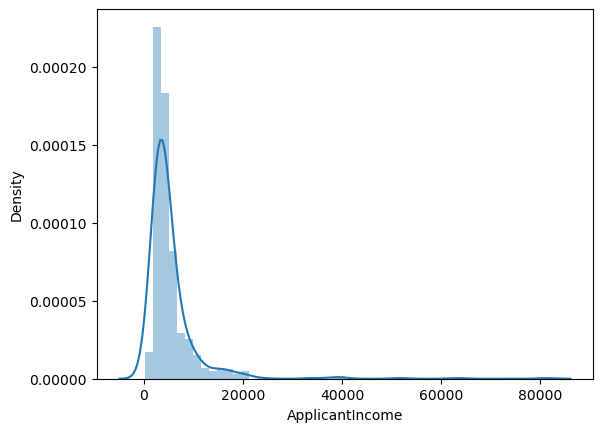

In [13]:
applicant_income = num_df['ApplicantIncome']
sns.distplot(applicant_income)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

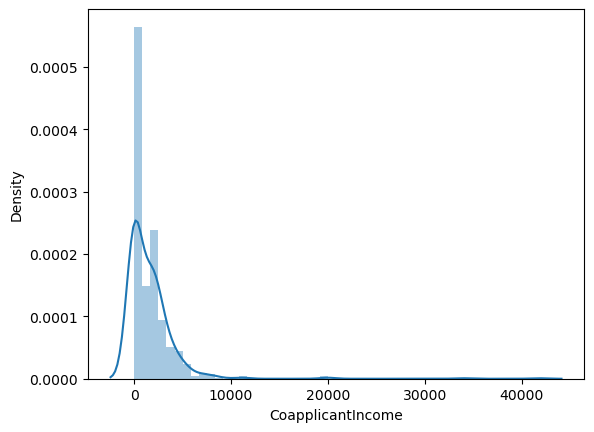

In [14]:
coapplicant_income = num_df['CoapplicantIncome']
sns.distplot(coapplicant_income)

In [15]:
# Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.
app_mean = num_df['ApplicantIncome'].mean()
app_median = num_df['ApplicantIncome'].median()

# Compare the mean and median for 'ApplicantIncome'
if app_mean > app_median:
    print("The Applicant income is right-skewed.")
elif app_mean < app_median:
    print("The Applicant income is left-skewed.")

The Applicant income is right-skewed.


In [16]:
co_mean = num_df['CoapplicantIncome'].mean()
co_median = num_df['CoapplicantIncome'].median()

# Compare the mean and median for 'CoapplicantIncome'
if co_mean > co_median:
    print("The Co-applicant income is right-skewed.")
elif co_mean < co_median:
    print("The Co-applicant income is left-skewed.")

The Co-applicant income is right-skewed.


Both applicant and co-applicant incomes are skewed to the right based of above calculations and visualizations with the distribution plot. This suggests that there are more low incomes than high incomes in the dataset.

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [17]:
# Selecting categorical varibales into new dataframe:
cat_df = df.loc[:, ['Gender','Married','Dependents','Education','Self_Employed', 'Property_Area', 'Loan_Status']]
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [18]:
# Return number of unique values for each categorical variable:
cat_df.nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [19]:
# Gender frequencies:
cat_df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [20]:
# Calculate the population of males as a percentage
male_count = cat_df.Gender.value_counts()['Male']
total_count = cat_df.Gender.count()

male_percentage = (male_count / total_count) * 100

# Print the result
print(f"Population of males: {male_percentage:.2f}%")

Population of males: 81.36%


In [21]:
# Married frequencies:
cat_df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [22]:
cat_df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [23]:
cat_df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [24]:
cat_df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [25]:
cat_df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [26]:
cat_df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



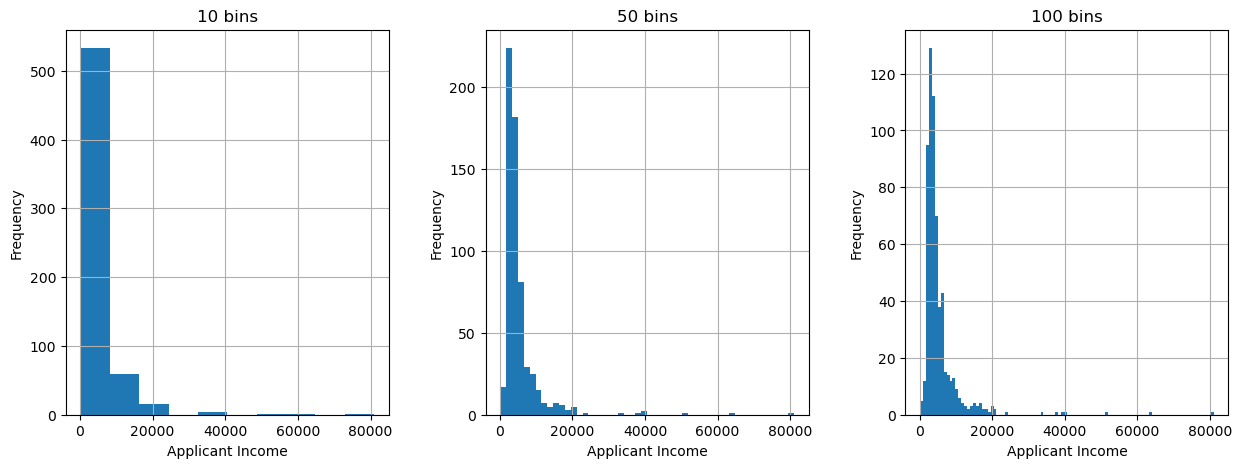

In [27]:
# create a 1x3 subplot grid
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# plot the histograms with different bins in each subplot
df['ApplicantIncome'].hist(bins=10, ax=axs[0])
axs[0].set_xlabel('Applicant Income')
axs[0].set_ylabel('Frequency')
axs[0].set_title('10 bins')

df['ApplicantIncome'].hist(bins=50, ax=axs[1])
axs[1].set_xlabel('Applicant Income')
axs[1].set_ylabel('Frequency')
axs[1].set_title('50 bins')

df['ApplicantIncome'].hist(bins=100, ax=axs[2])
axs[2].set_xlabel('Applicant Income')
axs[2].set_ylabel('Frequency')
axs[2].set_title('100 bins')

# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# display the plot
plt.show()



Look at box plots to understand the distributions. 

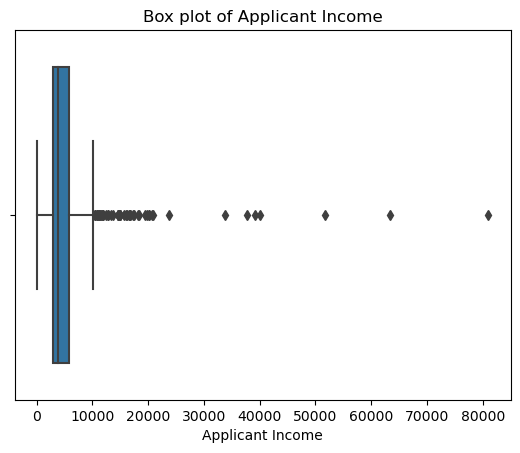

In [28]:
import seaborn as sns

sns.boxplot(x='ApplicantIncome', data=df)
plt.xlabel('Applicant Income')
plt.title('Box plot of Applicant Income')
plt.show()

Look at the distribution of income segregated  by `Education`

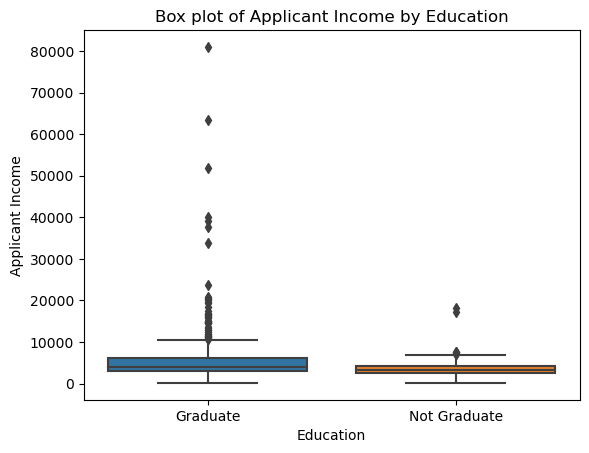

In [29]:
# create a box plot of 'ApplicantIncome' by 'Education'
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.title('Box plot of Applicant Income by Education')
plt.show()

Look at the histogram and boxplot of LoanAmount

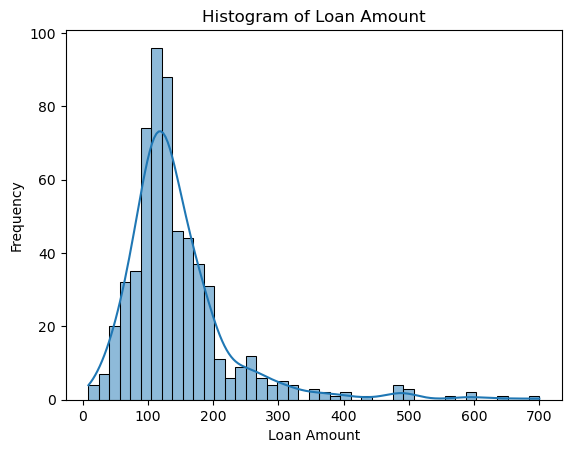

In [30]:
# create a histogram of 'LoanAmount'
sns.histplot(x='LoanAmount', data=df, kde=True) # 'kde=True' adds line to the histogram 
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amount')
plt.show()

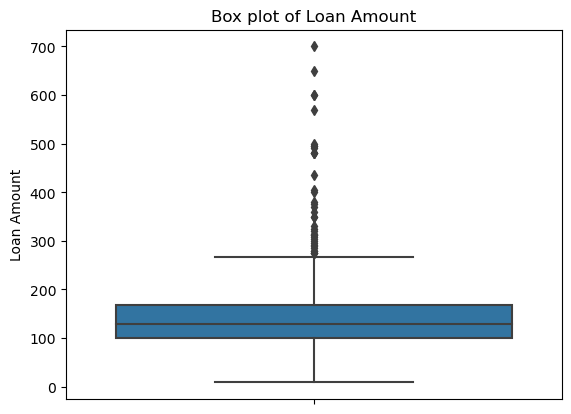

In [31]:
# create a box plot of 'LoanAmount'
sns.boxplot(y='LoanAmount', data=df)
plt.ylabel('Loan Amount')
plt.title('Box plot of Loan Amount')
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

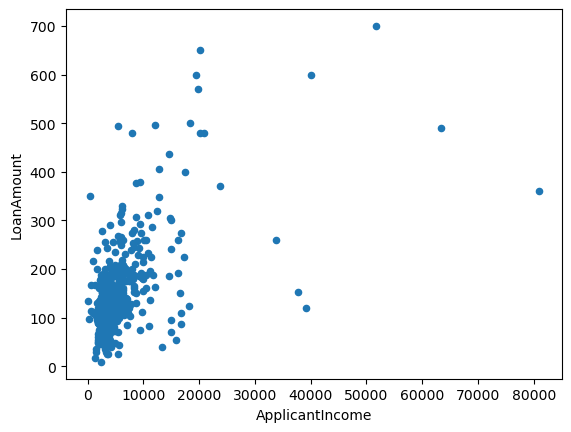

In [32]:
df.plot.scatter(x='ApplicantIncome', y='LoanAmount')

We can see extreme values which very well might be genuine and represent high-income earners. However, even though its possible to get a big loan amount as a low0income earner it is more hard. I will have to investigate further for this...

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [33]:
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [34]:
# Create pivot table that compares gender to loan amount 
gender_loan_status = df.pivot_table(values='Loan_ID', index='Gender', columns='Loan_Status', aggfunc='count')

# Show pivot table
print(gender_loan_status)

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


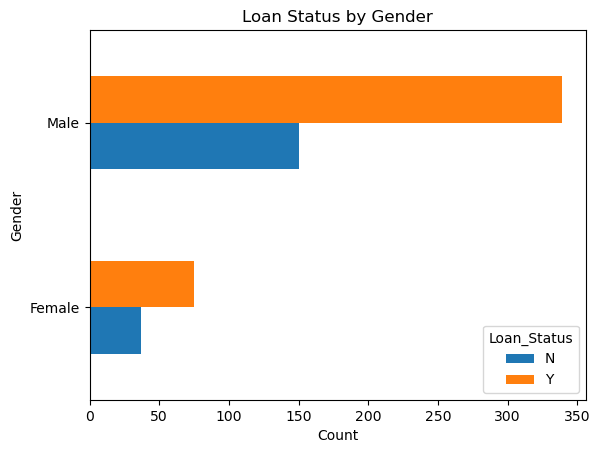

In [35]:
# Plot stacked bar chart
gender_loan_status.plot(kind='barh')

# Set chart title and axis labels
plt.title('Loan Status by Gender')
plt.xlabel('Count')
plt.ylabel('Gender')

# Show chart
plt.show()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [36]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
# Categorical variables can be imputed with mode as the most common/frequent values will be used to replace the missing values:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Dependents'] = df['Dependents'].replace('3+', 4) #'3+' is viewed as a string and should be changed so it can be fed into model
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [38]:
# Numerical variables are continuos so they can be imputed with median to replace the missing values since our data is skewed:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

In [39]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [40]:
df['LoanAmount'].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

we can see above that the min value is 9 and max is 700 meaning there are extreme values present in 'LoanAmount'. SD is also high when compared to the mean which shows there is alot of variation in the data.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

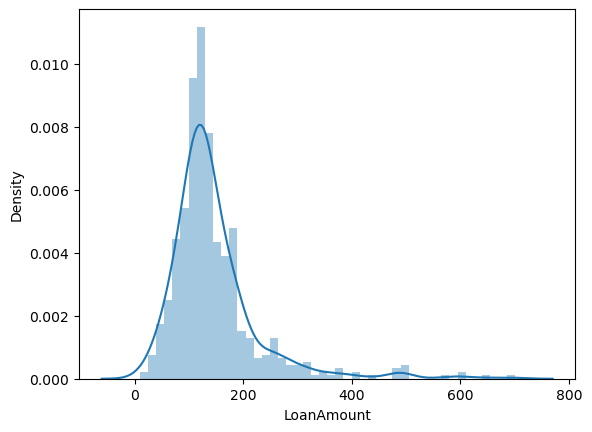

In [41]:
# plot histogram of 'LoanAmount' before transformation
sns.distplot(df['LoanAmount'])

In [42]:
# perform log transformation on LoanAmount
df['LoanAmount_log'] = np.log(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

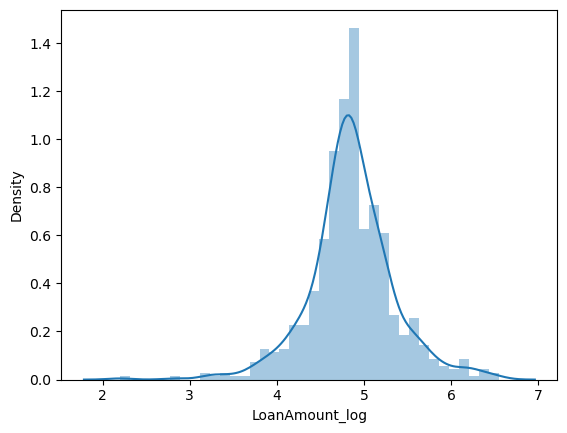

In [43]:
# plot histogram of 'LoanAmount' after transformation
sns.distplot(df['LoanAmount_log'])

after the log transformation the effect of the extreme values is diminished resulting in a more normally distributed dataset for 'LoanAmount'

Combine both incomes as total income and take a log transformation of the same.

In [44]:
# combine ApplicantIncome and CoapplicantIncome to get TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

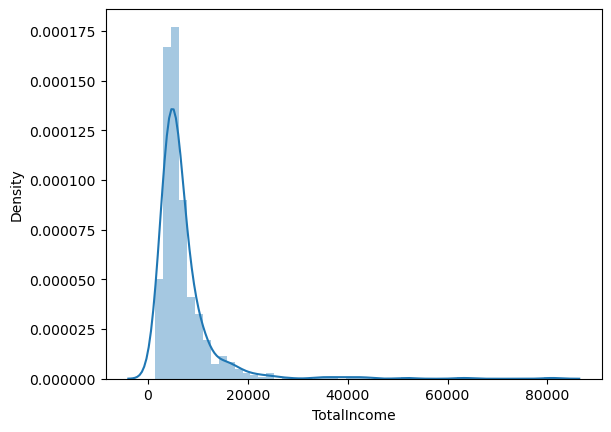

In [45]:
# plot histogram of 'TotalIncome' before transformation
sns.distplot(df['TotalIncome'])

In [46]:
# perform log transformation on TotalIncome
df['TotalIncome_log'] = np.log(df['TotalIncome'])

<AxesSubplot:xlabel='TotalIncome_log', ylabel='Density'>

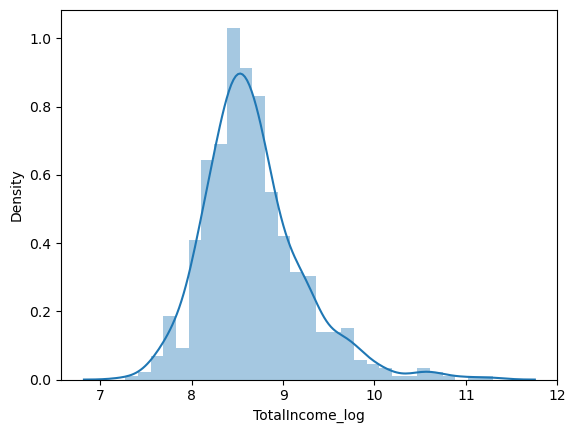

In [47]:
# plot histogram of 'TotalIncome' after transformation
sns.distplot(df['TotalIncome_log'])

after the log transformation the effect of the extreme values is diminished resulting in a more normally distributed dataset for 'TotalIncome'

In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [49]:
# rename columns for easier readability:
df = df.rename(columns={'TotalIncome_log': 'Total_Income_log'})
df = df.rename(columns={'TotalIncome': 'Total_Income'})
df = df.rename(columns={'LoanAmount_log': 'Loan_Amount_log'})
df = df.rename(columns={'ApplicantIncome': 'Applicant_Income'})
df = df.rename(columns={'CoapplicantIncome': 'Coapplicant_Income'})
df = df.rename(columns={'LoanAmount': 'Loan_Amount'})

In [50]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


firstly, we will have to convert all categorical columns into binary so their values can be fed into the machine learning model.

In [51]:
df.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income      float64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
Loan_Amount_log       float64
Total_Income          float64
Total_Income_log      float64
dtype: object

In [52]:
# perform label encoding on couple categorial columns since we want to keep the same columns:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# change categorical columns into numerical columns where Num = numerical:
df['Gender_Num'] = le.fit_transform(df['Gender'])
df['Married_Num'] = le.fit_transform(df['Married'])
df['Education_Num'] = le.fit_transform(df['Education'])
df['Self_Employed_Num'] = le.fit_transform(df['Self_Employed'])
df['Property_Area_Num'] = le.fit_transform(df['Property_Area'])
df['Loan_Status_Num'] = le.fit_transform(df['Loan_Status'])

In [53]:
df.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income      float64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
Loan_Amount_log       float64
Total_Income          float64
Total_Income_log      float64
Gender_Num              int32
Married_Num             int32
Education_Num           int32
Self_Employed_Num       int32
Property_Area_Num       int32
Loan_Status_Num         int32
dtype: object

In [54]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,...,Loan_Status,Loan_Amount_log,Total_Income,Total_Income_log,Gender_Num,Married_Num,Education_Num,Self_Employed_Num,Property_Area_Num,Loan_Status_Num
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,...,Y,4.852030,5849.0,8.674026,1,0,0,0,2,1
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,...,N,4.852030,6091.0,8.714568,1,1,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,...,Y,4.189655,3000.0,8.006368,1,1,0,1,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,...,Y,4.787492,4941.0,8.505323,1,1,1,0,2,1
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,...,Y,4.948760,6000.0,8.699515,1,0,0,0,2,1


In [55]:
df.shape

(614, 22)

we can save this new df as a csv since it has been cleaned and encoded, 'Loan_ID, Gender, Married, Education and Self-Employed' are included in this csv but will be dropped later since it is not numerical.

In [56]:
# save 'modified_df' into csv:
df.to_csv(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\deployment-project\data\data_clean.csv', index=False) 

In [57]:
df.shape

(614, 22)

## 4. Building a Predictive Model

In [58]:
# initialize X & y variables, where y = target variable 'Loan_Status_Num'
y = df['Loan_Status_Num']
X = df.drop(['Loan_Status_Num', 'Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Applicant_Income', 'Coapplicant_Income', 
            'Loan_Amount_log', 'Total_Income_log'], axis=1)

In [59]:
X.head()

,Dependents,Loan_Amount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Num,Married_Num,Education_Num,Self_Employed_Num,Property_Area_Num
0,0,128.0,360.0,1.0,5849.0,1,0,0,0,2
1,1,128.0,360.0,1.0,6091.0,1,1,0,0,0
2,0,66.0,360.0,1.0,3000.0,1,1,0,1,2
3,0,120.0,360.0,1.0,4941.0,1,1,1,0,2
4,0,141.0,360.0,1.0,6000.0,1,0,0,0,2


In [60]:
# double check to see only numerical values exist in the X variable 
X.dtypes

Dependents            object
Loan_Amount          float64
Loan_Amount_Term     float64
Credit_History       float64
Total_Income         float64
Gender_Num             int32
Married_Num            int32
Education_Num          int32
Self_Employed_Num      int32
Property_Area_Num      int32
dtype: object

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression Model

since we are solving a classification problem

In [62]:
# initialize logistic regression model as baseline model to compare to:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

# fit model to training data
lr.fit(X_train, y_train)

# make predictions on test data
y_pred = lr.predict(X_test)

In [63]:
lr.score(X_test, y_test)

0.7837837837837838

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score = {}'.format(accuracy))

# precision score
precision = precision_score(y_test, y_pred)
print('Precision Score = {}'.format(precision))

# recall score
recall = recall_score(y_test, y_pred)
print('Recall Score = {}'.format(recall))

# f1 score
f1 = f1_score(y_test, y_pred)
print('F1 Score = {}'.format(f1))

Accuracy Score = 0.7837837837837838
Precision Score = 0.7564102564102564
Recall Score = 0.9833333333333333
F1 Score = 0.8550724637681159


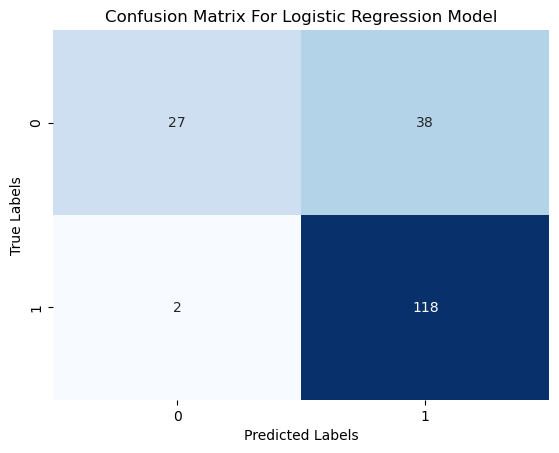

In [65]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix For Logistic Regression Model")
plt.show()

Try paramater grid search to improve the results

In [66]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to be tested
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 50, 100], # controls regularization strength (lower is stronger)
              'penalty': ['none', '11', 'l2']}

In [67]:
# Create the GridSearchCV object with the specified hyperparameters and cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)

In [68]:
# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 50, 100],
                         'penalty': ['none', '11', 'l2']})

In [69]:
# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters:  {'C': 0.01, 'penalty': 'none'}
Best cross-validation score:  0.8181121751025993


In [70]:
grid_lr_model = grid_search.best_params_
grid_lr_model

{'C': 0.01, 'penalty': 'none'}

when using grid_search we achieve a higher score of 0.81 compared to the previous result of 0.78

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [71]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer
from sklearn.feature_selection import VarianceThreshold

In [72]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', VarianceThreshold()),
    ('classifier', LogisticRegression())
])

pipe_param = {
    'scaler': [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler(),
        MaxAbsScaler(),
        QuantileTransformer(), 
        PowerTransformer()
    ],
    'selector__threshold': [0, 0.001, 0.01],
    'classifier__penalty': ['l1', 'l2', 'none'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'classifier__solver': ['liblinear', 'saga']
}

In [73]:
# Create the GridSearchCV object with the specified hyperparameters and cross-validation
pipe_grid = GridSearchCV(pipe, pipe_param, cv=5)

In [74]:
# Fit the grid search object to the training data
pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selector', VarianceThreshold()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
                         'classifier__penalty': ['l1', 'l2', 'none'],
                         'classifier__solver': ['liblinear', 'saga'],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler(), MaxAbsScaler(),
                                    QuantileTransformer(), PowerTransformer()],
                         'selector__threshold': [0, 0.001, 0.01]})

In [75]:
# print scores for pipeline
print(f'Training score: {str(pipe_grid.score(X_train, y_train))}')
print(f'Test score: {str(pipe_grid.score(X_test, y_test))}')

Training score: 0.8205128205128205
Test score: 0.7837837837837838


In [76]:
print(pipe_grid.best_params_)

{'classifier__C': 0.001, 'classifier__penalty': 'none', 'classifier__solver': 'saga', 'scaler': PowerTransformer(), 'selector__threshold': 0}


In [77]:
# keep selected pipe model as final
final_pipe = pipe_grid.best_estimator_
print(final_pipe)

Pipeline(steps=[('scaler', PowerTransformer()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier',
                 LogisticRegression(C=0.001, penalty='none', solver='saga'))])


I would like to comeback to this in the future to fully execute and transform my data prep, feat. engineering and modeling steps into the Pipeline as I was short on time. This is a barebones pipeline model that still works and passes through properly

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [78]:
# pickle model
import pickle

# Save the pipeline object to a file
with open('C:/Users/Jagvir Dhesi/lighthouselabs/projects/deployment-project/data/loan_model.pkl', 'wb') as file:
    pickle.dump(final_pipe, file)

In [79]:
# # pickle model
# import pickle
# pickle.dump( grid_search, open( "model.p", "wb" ) )

In [80]:
# load the pickle file
with open('C:/Users/Jagvir Dhesi/lighthouselabs/projects/deployment-project/data/loan_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)   
    
# use the loaded model to make predictions
predictions = loaded_model.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0])

In [81]:
# # load the pickle file
# model = pickle.load( open( "model.p", "rb" ) )
# predictions = model.predict(X_test)
# predictions

## API Creation

In [82]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the model
with open('C:/Users/Jagvir Dhesi/lighthouselabs/projects/deployment-project/data/loan_model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from the POST request.
    data = request.get_json(force=True)

    # Make prediction using the loaded model
    prediction = model.predict([data['loan_data']])

    # Return the prediction as a JSON object
    output = {'prediction': prediction[0]}
    return jsonify(output)

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.82:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [ ]:
X.head()

In [91]:
#  url for public access: http://3.88.252.24:5000/

In [90]:
import requests
import json

# URL for the Flask app
url = 'http://3.88.252.24:5000/predict'

# Creating a dictionary of features
features = {'Gender_Num': 1,
             'Married_Num': 1,
             'Dependents': 0,
             'Education_Num': 1,
             'Self_Employed_Num': 0,
             'Credit_History': 1,
             'Property_Area_Num': 2,
             'Loan_Amount': 1000,
             'Total_Income': 20000.0,
             'Loan_Amount_Term': 360.0}

# Creating a json_data to be tested
json_data = {'loan_data': features}

# Sending POST request to the Flask app with the json_data
response = requests.post(url, json=json_data)

# Converting the response content to a Python dictionary
response_data = json.loads(response.content.decode())

# Printing the prediction
prediction = response_data['prediction']
print(f"Prediction: {prediction}")

# Adding the prediction to the original code
if prediction == 1:
    print('Congratulations, your loan has been approved!')
else:
    print('Sorry, your loan has been rejected.')

Prediction: [0]
Sorry, your loan has been rejected.
<Response [200]>
